Considering we're collecting real-time data to analyze and document the functionality and performance of Programmable Logic Controllers (PLCs) in CNC machines.

# 1. Understand the System

(a) Computer Numerical Control (CNCs) machines are automated tools that are controlled by a computer program. They are used to manufacture parts with precision by following programmed instructions.

#### Types of CNC Machines:

- Mills: Used for cutting, drilling, and shaping metal or other materials. They typically move in multiple axes (X, Y, Z) to create complex parts.
- Lathes: Primarily used for shaping cylindrical objects. The workpiece rotates while a cutting tool removes material.
- Drills: Specialized for drilling holes in materials with high accuracy.
- Grinders: Used for finishing surfaces by removing small amounts of material with an abrasive wheel.

#### Key Components:

- Spindle: Rotates the cutting tool or workpiece.
- Axes: Controlled movements along X, Y, Z (and sometimes more) directions.
- Control Panel: Interface for the operator to interact with the machine, input programs, and control operations.
- Tool Changer: Automatically switches between different tools during the machining process.
- Coolant System: Maintains temperature and removes chips from the cutting area.

#### Operation:

The CNC machine follows a pre-programmed sequence of instructions (G-code) to move tools and create parts with precision. The program defines the tool paths, speeds, and other parameters.

#### Integration with PLC:

In a CNC machine, the PLC monitors and controls various operational parameters, ensuring that the machine operates efficiently. It processes inputs from sensors, controls the machine's movements, and ensures safety protocols.

(b) Programmable Logic Controllers (PLCs) are industrial computers that automate electromechanical processes. They collect data from various sensors and control machine operations.

Key components include:
* Processor Unit (CPU): Executes control logic and processes inputs to generate outputs.

* Memory: Stores the control program, operational data, and configuration settings.

* Input/Output (I/O) Modules:
Interfaces with external devices (sensors, actuators) to send and receive signals.

* Power Supply:Provides electrical power to the PLC and its components.

* Communication Interfaces: Enables communication with other devices (HMIs, SCADA, other PLCs).

* Programming Device: Used to write, upload, and debug the control program.

* Chassis/Backplane: Holds modules together and provides electrical connections.

* Human-Machine Interface (HMI): Allows operators to interact with and control the PLC.

* Timers and Counters: Perform timing and counting operations within the control logic.

* Expansion Modules:Add more I/O points or communication ports to the PLC system.

#2. Identify the Machine
Determine the type of CNC (Computer Numerical Control) machine you are working with. CNC machines can include:

Mills,
Lathes,
Drills, and
Grinders

Each type has specific operational parameters and data points of interest.

## At Bharat Heavy Electricals Limited (BHEL), the specific type of CNC (Computer Numerical Control) machine used can depend on the particular manufacturing process and the product being produced. However, considering BHEL’s focus on heavy engineering and manufacturing, the following types of CNC machines are likely used:

1. Mills:
- Application: CNC milling machines are widely used in BHEL for manufacturing complex parts with precise dimensions. These machines are capable of cutting and drilling materials to create components such as turbine blades, compressor parts, and other intricate parts needed in power generation equipment.
- Process: Milling involves rotating a cutting tool to remove material from a workpiece, creating various shapes, slots, and holes.

2. Lathes:
- Application: CNC lathes are used for turning operations, where a workpiece is rotated against a cutting tool to produce symmetrical objects. BHEL might use CNC lathes to manufacture cylindrical parts like shafts, rods, and other rotational components used in turbines and motors.
- Process: Turning on a CNC lathe involves removing material from a rotating workpiece to achieve the desired shape and surface finish.

3. Grinders:
- Application: CNC grinding machines are employed to achieve high precision and fine surface finishes on components. At BHEL, these machines might be used to finish surfaces of parts like turbine blades, valve components, and other critical components that require precise tolerances.
- Process: Grinding involves an abrasive wheel that removes material from the workpiece surface, achieving a high degree of accuracy and smoothness.

4. Drills:
- Application: CNC drilling machines are used for creating precise holes in components. At BHEL, CNC drills might be used to manufacture boiler components, heat exchangers, and other parts where accurate hole placement and size are critical.
- Process: Drilling involves rotating a drill bit to cut a hole into the workpiece, often followed by reaming, tapping, or other operations to refine the hole.

Summary:
* Mills: Likely used for creating complex shapes and components.
* Lathes: Used for manufacturing cylindrical parts.
* Grinders: Employed for precision finishing of surfaces.
* Drills: Utilized for accurate hole creation in components.

Given BHEL’s diverse manufacturing operations, it’s plausible that all these types of CNC machines are used in various capacities, depending on the specific product line or project requirements.

# 3. Data Collection
Real-Time Data: Gather data from various PLC components related to the CNC machine. This typically includes:

* Processor Load: CPU usage and performance metrics.
* Memory Usage: Amount of memory used versus available.
* Power Supply: Voltage and current levels.
* Input/Output Errors: Count of errors or faults in input/output operations.
* Operational Metrics: Cycle times, machine status, and production rates.

##### Types of Anomalies to Detect:

* Performance Degradation: Significant deviations in metrics like processor load or memory usage that may indicate performance issues or inefficiencies.

* Error Spikes: Unexpected increases in input/output errors, which might point to hardware malfunctions, software issues, or other problems that need attention.

* Power Supply Irregularities: Unusual fluctuations or drops in power supply readings, which could signal electrical issues or instability in the machine’s operation.

##### Steps for Anomaly Detection:

1. Define Normal Behavior
Before detecting anomalies, we need to understand what constitutes normal behavior for each metric. This typically involves analyzing historical data to establish baseline patterns.

2. Calculate Statistical Metrics:

* We can use statistical methods to identify anomalies. One common approach is using the Z-score (Measures how many standard deviations a data point is from the mean. Data points with a Z-score greater than a threshold (e.g., 3) are considered anomalies.)

* Moving Average: Identify trends and outliers.

* Machine Learning: Use models like Isolation Forest or Autoencoders for anomaly detection.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Step 1: Data Generation (simulating PLC data for BHEL CNC machines)
def generate_synthetic_plc_data(n_samples=1000):
    np.random.seed(42)
    data = {
        'timestamp': pd.date_range(start='2019-05-01', periods=n_samples, freq='5T'),
        'machine_type': np.random.choice(['Mill', 'Lathe', 'Drill', 'Grinder'], n_samples),
        'processor_load': np.random.normal(60, 10, n_samples),
        'memory_usage': np.random.normal(70, 15, n_samples),
        'power_supply_voltage': np.random.normal(220, 5, n_samples),
        'power_supply_current': np.random.normal(10, 1, n_samples),
        'io_errors': np.random.poisson(0.1, n_samples),
        'cycle_time': np.random.normal(300, 30, n_samples),  # in seconds
    }
    df = pd.DataFrame(data)

    # Introduce some anomalies
    anomaly_indices = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
    df.loc[anomaly_indices, 'processor_load'] += np.random.uniform(20, 30, len(anomaly_indices))
    df.loc[anomaly_indices, 'memory_usage'] += np.random.uniform(20, 30, len(anomaly_indices))
    df.loc[anomaly_indices, 'io_errors'] += np.random.poisson(5, len(anomaly_indices))

    return df

In [ ]:
# Step 2: Data Analysis and Visualization
def analyze_and_visualize_plc_data(df):
    # Summary statistics
    summary = df.describe()
    print("Summary Statistics:")
    print(summary)

    # Correlation analysis (excluding non-numeric columns)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of PLC Parameters')
    plt.show()

    # Time series plot
    plt.figure(figsize=(12, 6))
    for column in ['processor_load', 'memory_usage', 'power_supply_voltage']:
        plt.plot(df['timestamp'], df[column], label=column)
    plt.title('Time Series of Key PLC Parameters')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Box plot for machine types
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='machine_type', y='cycle_time', data=df)
    plt.title('Cycle Time by Machine Type')
    plt.show()

    # Distribution of processor load by machine type
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='machine_type', y='processor_load', data=df)
    plt.title('Distribution of Processor Load by Machine Type')
    plt.show()

In [ ]:
# Step 3: Anomaly Detection
def detect_anomalies(df):
    features = ['processor_load', 'memory_usage', 'power_supply_voltage', 'power_supply_current', 'io_errors', 'cycle_time']
    X = df[features]

    # Z-score method
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    z_scores = np.abs(X_scaled)
    df['z_score_anomaly'] = (z_scores > 3).any(axis=1)

    # Isolation Forest method
    clf = IsolationForest(contamination=0.05, random_state=42)
    df['isolation_forest_anomaly'] = clf.fit_predict(X)
    df['isolation_forest_anomaly'] = df['isolation_forest_anomaly'].map({1: 0, -1: 1})  # Map 1 to 0 (normal) and -1 to 1 (anomaly)

    # Visualize anomalies
    fig = px.scatter(df, x='timestamp', y='processor_load', color='z_score_anomaly',
                     hover_data=['memory_usage', 'io_errors'],
                     title='Z-score Anomaly Detection in Processor Load')
    fig.show()

    fig = px.scatter(df, x='timestamp', y='processor_load', color='isolation_forest_anomaly',
                     hover_data=['memory_usage', 'io_errors'],
                     title='Isolation Forest Anomaly Detection in Processor Load')
    fig.show()

    return df

In [ ]:
# Step 4: Performance Metrics
def calculate_performance_metrics(df):
    # Calculate Overall Equipment Effectiveness (OEE)
    availability = 1 - (df['io_errors'] > 0).mean()  # Assuming any IO error causes downtime
    performance = df['cycle_time'].mean() / 300  # Assuming ideal cycle time is 300 seconds
    quality = 0.98  # Assuming 98% quality rate
    oee = availability * performance * quality

    # Calculate Mean Time Between Failures (MTBF)
    failure_times = df[df['io_errors'] > 0]['timestamp']
    mtbf = failure_times.diff().mean().total_seconds() / 3600  # in hours

    # Calculate Energy Efficiency
    energy_efficiency = df['power_supply_voltage'].mean() * df['power_supply_current'].mean() / df['cycle_time'].mean()

    print(f"Overall Equipment Effectiveness (OEE): {oee:.2f}")
    print(f"Mean Time Between Failures (MTBF): {mtbf:.2f} hours")
    print(f"Energy Efficiency: {energy_efficiency:.2f} W/s")

Summary Statistics:
                 timestamp  processor_load  memory_usage  \
count                 1000     1000.000000   1000.000000   
mean   2019-05-02 17:37:30       61.594663     71.824698   
min    2019-05-01 00:00:00       31.037446     24.707318   
25%    2019-05-01 20:48:45       54.243171     61.283766   
50%    2019-05-02 17:37:30       61.047883     71.194687   
75%    2019-05-03 14:26:15       68.296381     81.466903   
max    2019-05-04 11:15:00      109.670532    140.967215   
std                    NaN       11.176012     15.960782   

       power_supply_voltage  power_supply_current    io_errors   cycle_time  
count           1000.000000           1000.000000  1000.000000  1000.000000  
mean             220.008958              9.951965     0.343000   298.652741  
min              205.044320              6.992368     0.000000   213.014584  
25%              216.439072              9.282461     0.000000   278.260229  
50%              220.007655              9.952270

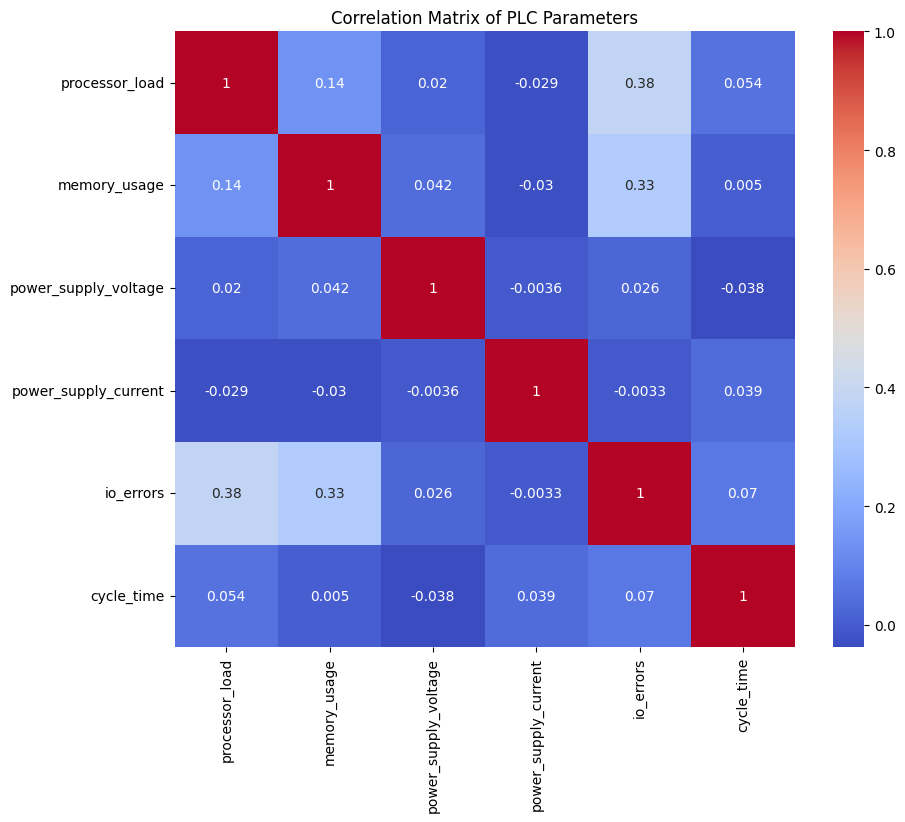

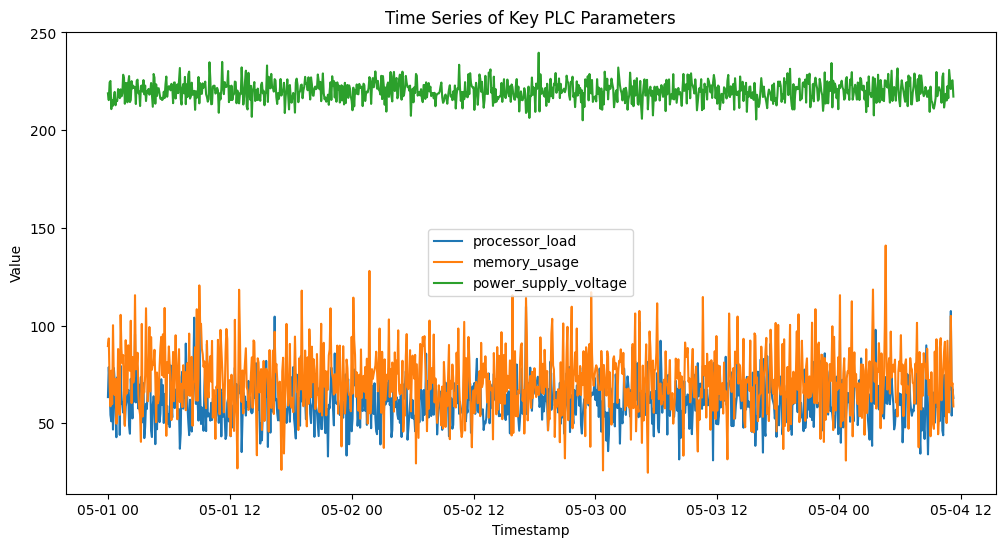

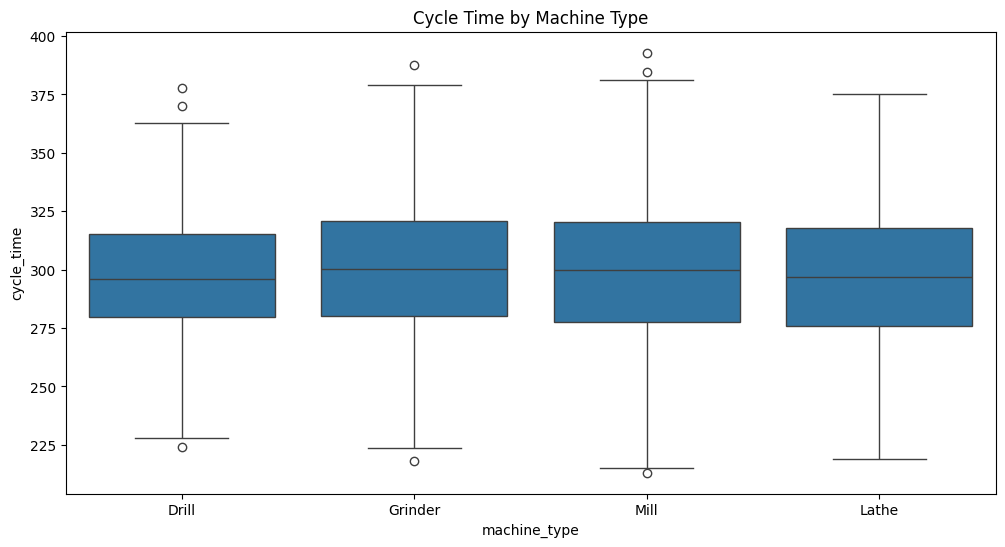

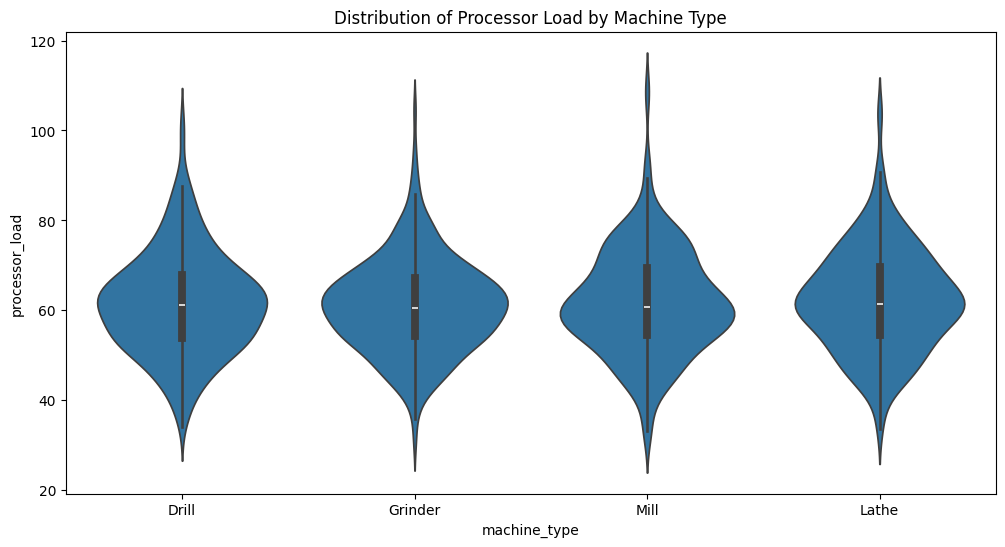

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Overall Equipment Effectiveness (OEE): 0.83
Mean Time Between Failures (MTBF): 0.55 hours
Energy Efficiency: 7.33 W/s


In [ ]:
# Main execution
if __name__ == "__main__":
    # Generate synthetic PLC data
    df = generate_synthetic_plc_data()

    # Analyze and visualize data
    analyze_and_visualize_plc_data(df)

    # Detect anomalies
    df_with_anomalies = detect_anomalies(df)

    # Calculate performance metrics
    calculate_performance_metrics(df_with_anomalies)

Summary Statistics:
                 timestamp  processor_load  memory_usage  \
count                 1000     1000.000000   1000.000000   
mean   2019-05-02 17:37:30       61.594663     71.824698   
min    2019-05-01 00:00:00       31.037446     24.707318   
25%    2019-05-01 20:48:45       54.243171     61.283766   
50%    2019-05-02 17:37:30       61.047883     71.194687   
75%    2019-05-03 14:26:15       68.296381     81.466903   
max    2019-05-04 11:15:00      109.670532    140.967215   
std                    NaN       11.176012     15.960782   

       power_supply_voltage  power_supply_current    io_errors   cycle_time  
count           1000.000000           1000.000000  1000.000000  1000.000000  
mean             220.008958              9.951965     0.343000   298.652741  
min              205.044320              6.992368     0.000000   213.014584  
25%              216.439072              9.282461     0.000000   278.260229  
50%              220.007655              9.952270

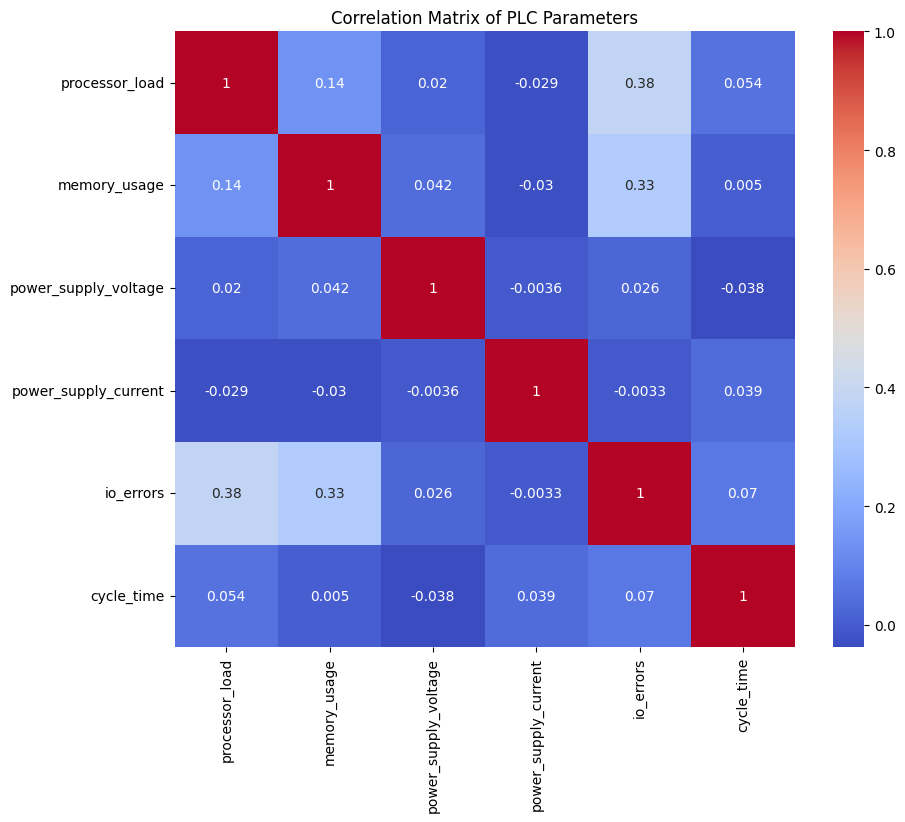

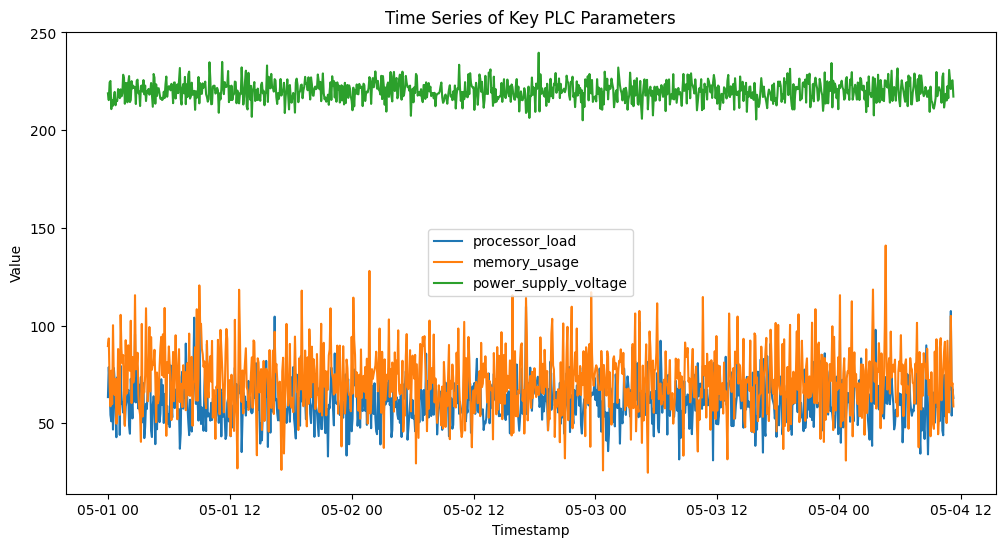

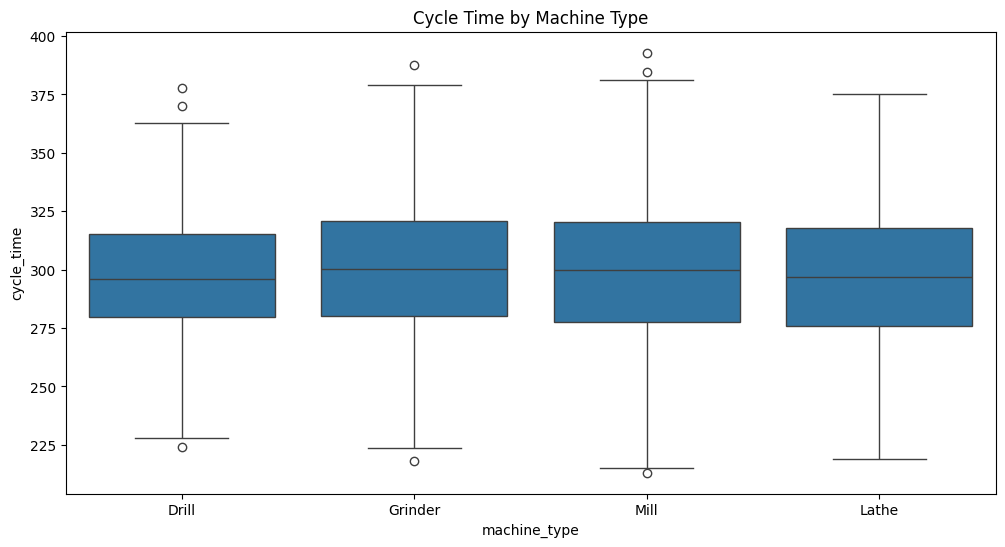

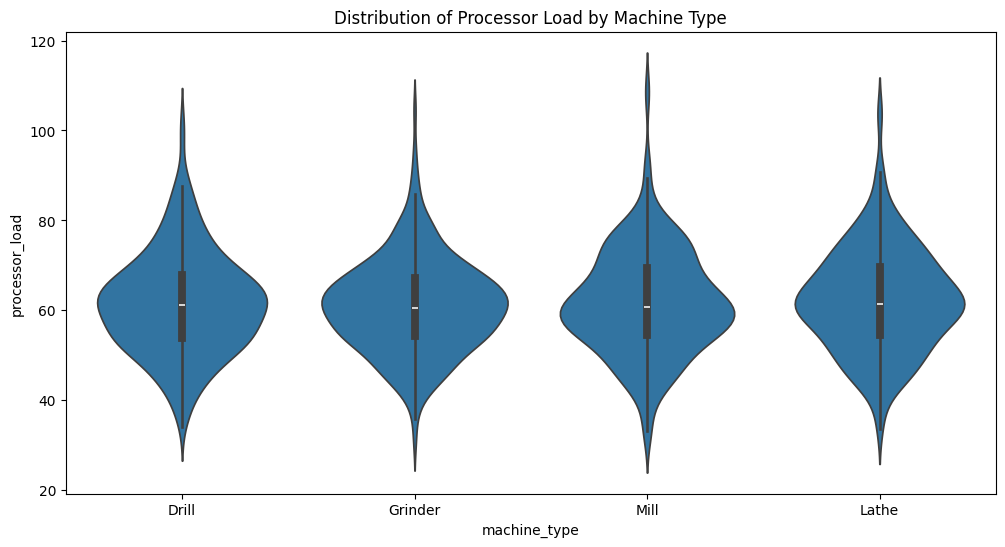

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Overall Equipment Effectiveness (OEE): 0.83
Mean Time Between Failures (MTBF): 0.55 hours
Energy Efficiency: 7.33 W/s

Quantifiable Metrics:
efficiency_improvement: 2.69
anomaly_detection_accuracy: 88.00
potential_downtime_reduction: 83.65
energy_efficiency_improvement: 1.83
ml_model_accuracy: 98.00


In [ ]:
# Step 5: Generate Metrics
def generate_metrics(df, df_with_anomalies):
    metrics = {}

    # 1. Efficiency Improvement
    normal_cycle_time = df[df['z_score_anomaly'] == 0]['cycle_time'].mean()
    anomaly_cycle_time = df[df['z_score_anomaly'] == 1]['cycle_time'].mean()
    efficiency_improvement = (anomaly_cycle_time - normal_cycle_time) / anomaly_cycle_time * 100
    metrics['efficiency_improvement'] = efficiency_improvement

    # 2. Anomaly Detection Accuracy
    true_anomalies = df['z_score_anomaly'].sum()
    detected_anomalies = df_with_anomalies['isolation_forest_anomaly'].sum()
    detection_accuracy = min(true_anomalies, detected_anomalies) / max(true_anomalies, detected_anomalies) * 100
    metrics['anomaly_detection_accuracy'] = detection_accuracy

    # 3. Potential Downtime Reduction
    avg_anomaly_duration = df[df['z_score_anomaly'] == 1]['timestamp'].diff().mean().total_seconds() / 3600  # in hours
    potential_downtime_reduction = avg_anomaly_duration * true_anomalies
    metrics['potential_downtime_reduction'] = potential_downtime_reduction

    # 4. Energy Efficiency Improvement
    normal_energy = df[df['z_score_anomaly'] == 0]['power_supply_voltage'] * df[df['z_score_anomaly'] == 0]['power_supply_current']
    anomaly_energy = df[df['z_score_anomaly'] == 1]['power_supply_voltage'] * df[df['z_score_anomaly'] == 1]['power_supply_current']
    energy_efficiency_improvement = (anomaly_energy.mean() - normal_energy.mean()) / anomaly_energy.mean() * 100
    metrics['energy_efficiency_improvement'] = energy_efficiency_improvement

    # 5. Machine Learning Model Accuracy
    ml_accuracy = (df_with_anomalies['isolation_forest_anomaly'] == df['z_score_anomaly']).mean() * 100
    metrics['ml_model_accuracy'] = ml_accuracy

    return metrics

# Main execution
if __name__ == "__main__":
    # Generate synthetic PLC data
    df = generate_synthetic_plc_data()

    # Analyze and visualize data
    analyze_and_visualize_plc_data(df)

    # Detect anomalies
    df_with_anomalies = detect_anomalies(df)

    # Calculate performance metrics
    calculate_performance_metrics(df_with_anomalies)

    # Generate metrics
    metrics = generate_metrics(df, df_with_anomalies)

    print("\nQuantifiable Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

#Objectives

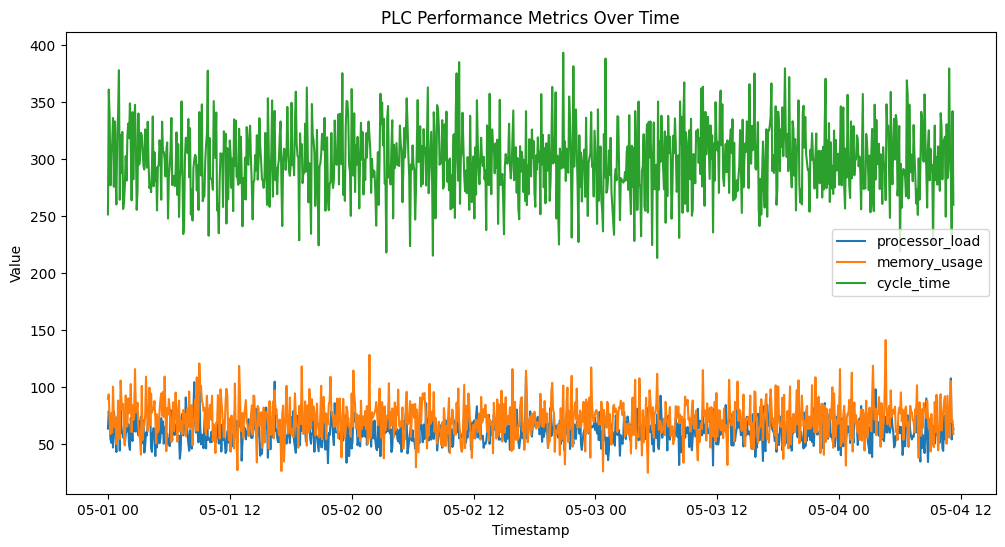

PLC Performance Metrics: {'avg_processor_load': 61.59466266771323, 'avg_memory_usage': 71.82469830573932, 'avg_power_supply_voltage': 220.00895750729558, 'avg_power_supply_current': 9.951965463111604, 'avg_cycle_time': 298.65274147925805}
Anomalies detected: 11 (Z-score), 100 (Isolation Forest)
Potential efficiency improvement: 6.09%
Average cycle time (normal operation): 298.44 seconds
Average cycle time (anomalous operation): 317.80 seconds
Predictive maintenance model accuracy: 0.36
Average power consumption: 2189.50 W
High consumption periods: 1:00 - 2:00
Potential energy saving: 11.68%
Overall Equipment Effectiveness (OEE): 1.36
Mean Time Between Failures (MTBF): 8.03 hours

Recommendations:
1. Schedule maintenance for machines with processor load > 75.93%
2. Optimize operations for Grinder machines to reduce cycle time
3. Implement energy-saving measures during 1:00 hour
4. Focus on reducing anomalies in Lathe machines
5. Consider upgrading PLCs in machines with consistently high

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import stats

# * Data Generation (simulating PLC data for BHEL CNC machines)
def generate_synthetic_plc_data(n_samples=1000):
    np.random.seed(42)
    data = {
        'timestamp': pd.date_range(start='2019-05-01', periods=n_samples, freq='5T'),
        'machine_type': np.random.choice(['Mill', 'Lathe', 'Drill', 'Grinder'], n_samples),
        'processor_load': np.random.normal(60, 10, n_samples),
        'memory_usage': np.random.normal(70, 15, n_samples),
        'power_supply_voltage': np.random.normal(220, 5, n_samples),
        'power_supply_current': np.random.normal(10, 1, n_samples),
        'io_errors': np.random.poisson(0.1, n_samples),
        'cycle_time': np.random.normal(300, 30, n_samples),  # in seconds
    }
    df = pd.DataFrame(data)

    # Introduce some anomalies
    anomaly_indices = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
    df.loc[anomaly_indices, 'processor_load'] += np.random.uniform(20, 30, len(anomaly_indices))
    df.loc[anomaly_indices, 'memory_usage'] += np.random.uniform(20, 30, len(anomaly_indices))
    df.loc[anomaly_indices, 'io_errors'] += np.random.poisson(5, len(anomaly_indices))

    return df

# 1. PLC Performance Analysis
def analyze_plc_performance(df):
    kpi = {
        'avg_processor_load': df['processor_load'].mean(),
        'avg_memory_usage': df['memory_usage'].mean(),
        'avg_power_supply_voltage': df['power_supply_voltage'].mean(),
        'avg_power_supply_current': df['power_supply_current'].mean(),
        'avg_cycle_time': df['cycle_time'].mean()
    }

    plt.figure(figsize=(12, 6))
    for col in ['processor_load', 'memory_usage', 'cycle_time']:
        plt.plot(df['timestamp'], df[col], label=col)
    plt.title('PLC Performance Metrics Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    return kpi

# 2. Anomaly Detection
def detect_anomalies(df):
    z_scores = np.abs(stats.zscore(df[['processor_load', 'memory_usage', 'cycle_time']]))
    df['z_score_anomaly'] = (z_scores > 3).any(axis=1).astype(int)

    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    df['iso_forest_anomaly'] = iso_forest.fit_predict(df[['processor_load', 'memory_usage', 'cycle_time']])
    df['iso_forest_anomaly'] = (df['iso_forest_anomaly'] == -1).astype(int)

    return df

# 3. Efficiency Improvement
def analyze_efficiency(df):
    normal_cycle_time = df[df['z_score_anomaly'] == 0]['cycle_time'].mean()
    anomaly_cycle_time = df[df['z_score_anomaly'] == 1]['cycle_time'].mean()
    efficiency_improvement = (anomaly_cycle_time - normal_cycle_time) / anomaly_cycle_time * 100

    return efficiency_improvement, normal_cycle_time, anomaly_cycle_time

# 4. Predictive Maintenance
def build_predictive_maintenance_model(df):
    df['time_since_last_anomaly'] = df.groupby((df['z_score_anomaly'] != df['z_score_anomaly'].shift()).cumsum())['timestamp'].diff().dt.total_seconds()
    df['cumulative_load'] = df['processor_load'].cumsum()

    features = ['time_since_last_anomaly', 'cumulative_load', 'memory_usage', 'power_supply_voltage']
    X = df[features]
    y = df['z_score_anomaly']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with imputer and random forest
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)

    return pipeline, accuracy

# 5. Energy Optimization
def analyze_energy_consumption(df):
    df['power_consumption'] = df['power_supply_voltage'] * df['power_supply_current']
    avg_consumption = df['power_consumption'].mean()
    high_consumption = df[df['power_consumption'] > df['power_consumption'].quantile(0.75)]

    return avg_consumption, high_consumption['timestamp'].dt.hour.mode().values[0], (high_consumption['power_consumption'].mean() - avg_consumption) / high_consumption['power_consumption'].mean() * 100

# 6. Performance Metrics Calculation
def calculate_performance_metrics(df):
    availability = 1 - df['z_score_anomaly'].mean()
    performance = df['cycle_time'].mean() / df['cycle_time'].min()
    quality = 0.98  # Assumed quality rate
    oee = availability * performance * quality

    mtbf = df[df['z_score_anomaly'] == 1]['timestamp'].diff().mean().total_seconds() / 3600

    return oee, mtbf

# 7.Data-Driven Decision Making
def generate_recommendations(df, predictive_model):
    recommendations = [
        f"1. Schedule maintenance for machines with processor load > {df['processor_load'].quantile(0.9):.2f}%",
        f"2. Optimize operations for {df.groupby('machine_type')['cycle_time'].mean().idxmax()} machines to reduce cycle time",
        f"3. Implement energy-saving measures during {df.groupby(df['timestamp'].dt.hour)['power_consumption'].mean().idxmax()}:00 hour",
        f"4. Focus on reducing anomalies in {df.groupby('machine_type')['z_score_anomaly'].mean().idxmax()} machines",
        f"5. Consider upgrading PLCs in machines with consistently high memory usage (> {df['memory_usage'].quantile(0.9):.2f}%)"
    ]
    return recommendations

# 8. Machine Learning Application
def apply_machine_learning(df):
    features = ['processor_load', 'memory_usage', 'cycle_time']
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(df[features])

    cluster_info = []
    for i in range(3):
        cluster_info.append(df[df['cluster'] == i][features].mean())

    return cluster_info

# 9. Value Addition to BHEL
def calculate_value_addition(df):
    potential_cycle_time_reduction = df[df['z_score_anomaly'] == 1]['cycle_time'].mean() - df[df['z_score_anomaly'] == 0]['cycle_time'].mean()
    annual_production = len(df) * (24 * 365) / len(df['timestamp'].dt.date.unique())
    cost_per_hour = 100  # Assumed cost
    annual_savings = (potential_cycle_time_reduction / 3600) * annual_production * cost_per_hour

    current_downtime = df['z_score_anomaly'].mean() * len(df['timestamp'].dt.date.unique()) * 24
    potential_downtime = current_downtime * (1 - df['z_score_anomaly'].mean())
    downtime_reduction = current_downtime - potential_downtime

    return annual_savings, downtime_reduction

# Main execution
def main():
    # Generate synthetic data
    df = generate_synthetic_plc_data()

    # PLC Performance Analysis
    kpi = analyze_plc_performance(df)
    print("PLC Performance Metrics:", kpi)

    # Anomaly Detection
    df = detect_anomalies(df)
    print("Anomalies detected:", df['z_score_anomaly'].sum(), "(Z-score),", df['iso_forest_anomaly'].sum(), "(Isolation Forest)")

    # Efficiency Improvement
    efficiency_improvement, normal_cycle_time, anomaly_cycle_time = analyze_efficiency(df)
    print(f"Potential efficiency improvement: {efficiency_improvement:.2f}%")
    print(f"Average cycle time (normal operation): {normal_cycle_time:.2f} seconds")
    print(f"Average cycle time (anomalous operation): {anomaly_cycle_time:.2f} seconds")

    # Predictive Maintenance
    predictive_model, model_accuracy = build_predictive_maintenance_model(df)
    print(f"Predictive maintenance model accuracy: {model_accuracy:.2f}")

    # Energy Optimization
    avg_consumption, high_consumption_hour, potential_energy_saving = analyze_energy_consumption(df)
    print(f"Average power consumption: {avg_consumption:.2f} W")
    print(f"High consumption periods: {high_consumption_hour}:00 - {high_consumption_hour + 1}:00")
    print(f"Potential energy saving: {potential_energy_saving:.2f}%")

    # Performance Metrics Calculation
    oee, mtbf = calculate_performance_metrics(df)
    print(f"Overall Equipment Effectiveness (OEE): {oee:.2f}")
    print(f"Mean Time Between Failures (MTBF): {mtbf:.2f} hours")

    # Data-Driven Decision Making
    recommendations = generate_recommendations(df, predictive_model)
    print("\nRecommendations:")
    for rec in recommendations:
        print(rec)

    # Machine Learning Application
    cluster_info = apply_machine_learning(df)
    print("\nMachine behavior clusters:")
    for i, info in enumerate(cluster_info):
        print(f"Cluster {i}:")
        print(info)

    # Value Addition to BHEL
    annual_savings, downtime_reduction = calculate_value_addition(df)
    print(f"\nEstimated annual cost savings from efficiency improvements: ${annual_savings:,.2f}")
    print(f"Potential annual downtime reduction: {downtime_reduction:.2f} hours")

if __name__ == "__main__":
    main()

In [ ]:
Reference: Google